## 4918 Ткачев М.А
---
#**Введение в анализ данных**
### Лабораторная работа №3 **Кластеризация данных**
---
### Индивидуальный вариант №5
Датасет: ***5gym_churn.csv***
> Информация о заемщиках:
1. gender – Пол
2. near_location – Близкое расположение
3. partner – Сотрудник компании партнера
4. promo_friends – По промо друзей
5. phone – Указан ли телефон
6. contract_period – Длительность текущего абонемента
7. group_visits – Посещение групповых занятий
8. age – Возраст
9. avg_additional_charges_total – Средние траты на доп услуги
10. month_to_end_contract – Количество месяцев до окончания абонемента
11. lifetime – Время с момента первого обращения в фитнес-центр (в месяцах)
12. avg_class_frequency_total – Средняя частота посещений в неделю за все время с начала действия абонемента
13. avg_class_frequency_current_month – Средняя частота посещений в неделю за предыдущий месяц
14. churn – Факт ухода из клуба
















In [1]:
# Подключаем библиотеку для обработки и анализа данных
import pandas as pd

In [2]:
# Загружаем датасет
df=pd.read_csv('5gym_churn.csv', delimiter=',')

In [3]:
# Выводим информацию о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Выводим первые 10 строк датасета
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Вывод

Ознакомившись с данные на первый взгляд с ними все хорошо только названия столбцов нужно привести к единому змеиному регистру, переименовывать не нужно так как названия столбцов соответствуют содержимому.

Типы данных также соответствуют.

# Предварительная подготовка данных

## Устранение проблем названий столбцов

In [5]:
# Вывели названия столбцов таблицы
print(*df.columns.tolist(), sep='\n')

gender
Near_Location
Partner
Promo_friends
Phone
Contract_period
Group_visits
Age
Avg_additional_charges_total
Month_to_end_contract
Lifetime
Avg_class_frequency_total
Avg_class_frequency_current_month
Churn


In [6]:
# Приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# Проверка
print(*df.columns.tolist(), sep='\n')

gender
near_location
partner
promo_friends
phone
contract_period
group_visits
age
avg_additional_charges_total
month_to_end_contract
lifetime
avg_class_frequency_total
avg_class_frequency_current_month
churn


### Вывод

Теперь названия столбцов имеют единый стиль змеиного регистра, что улучшает восприяние информации.

## Обработка пропусков

In [7]:
# поиск пустых значений
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

### Вывод

Пропусков в дата сете не оказалось, исправлять ничего не нужно – это упрощает нам работу.

## Устранение дубликатов 

In [8]:
# проверим, есть ли дубликаты в таблице
df.duplicated().sum()

0

### Вывод

Дубликаты отсутствуют.

## Обработка других ошибок в данных

In [9]:
import numpy as np
# посмотрим уникальные значения в столбцах
for i in df.columns:
  if i not in ['avg_additional_charges_total', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    print('Столбец: ' + i, *np.sort(df[i].unique()),'_____________________________________', sep='\n')

Столбец: gender
0
1
_____________________________________
Столбец: near_location
0
1
_____________________________________
Столбец: partner
0
1
_____________________________________
Столбец: promo_friends
0
1
_____________________________________
Столбец: phone
0
1
_____________________________________
Столбец: contract_period
1
6
12
_____________________________________
Столбец: group_visits
0
1
_____________________________________
Столбец: age
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
41
_____________________________________
Столбец: lifetime
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
26
27
29
31
_____________________________________
Столбец: churn
0
1
_____________________________________


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


### Вывод

Проверив данные в столбцах на наличие ошибочных значений, не нашли их.

Все значения количественных значений в допустимых пределах, а категориальные данные не содержат ошибочных значений.

# Кластеризация объектов

## Стандартизация данных

Выберали метод стандартизации, потому что это наиболее часто используемы метод. Масштабирование данных будем производить с помощью класса StandardScaler() из модуля preprocessing библиотеки для машинного обучения sklearn.

In [11]:
# Импорт модуля !pip install --upgrade pip

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()           # создаём объект класса scaler
df_sc = scaler.fit_transform(df)    # обучаем стандартизатор и преобразуем набор данных

## Агломеративная иерархическая кластеризация

### Удаление целевого признака из данных

In [12]:
# Кластеризация без цлевого признака в данных
df_sc = pd.DataFrame(df_sc, columns = df.columns)
y = df_sc['churn']
X = df_sc.drop(['churn'], axis=1)

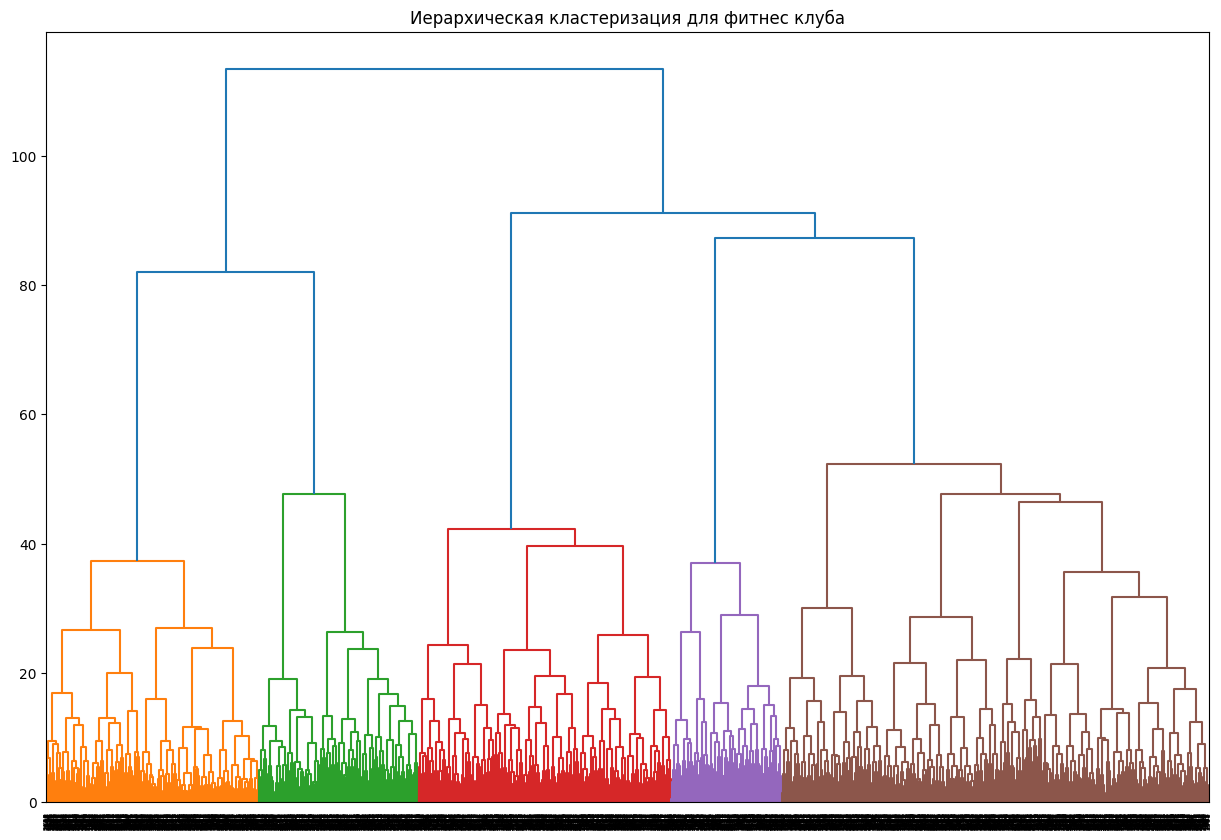

In [13]:
# Импортируем из модуля для иерархической кластеризации hierarchy
# классы модели кластеризации linkage() и dendrogram():
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Создали таблицу «связок» между объектами
linked = linkage(df_sc, method = 'ward')

# Построение дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для фитнес клуба')
plt.show()

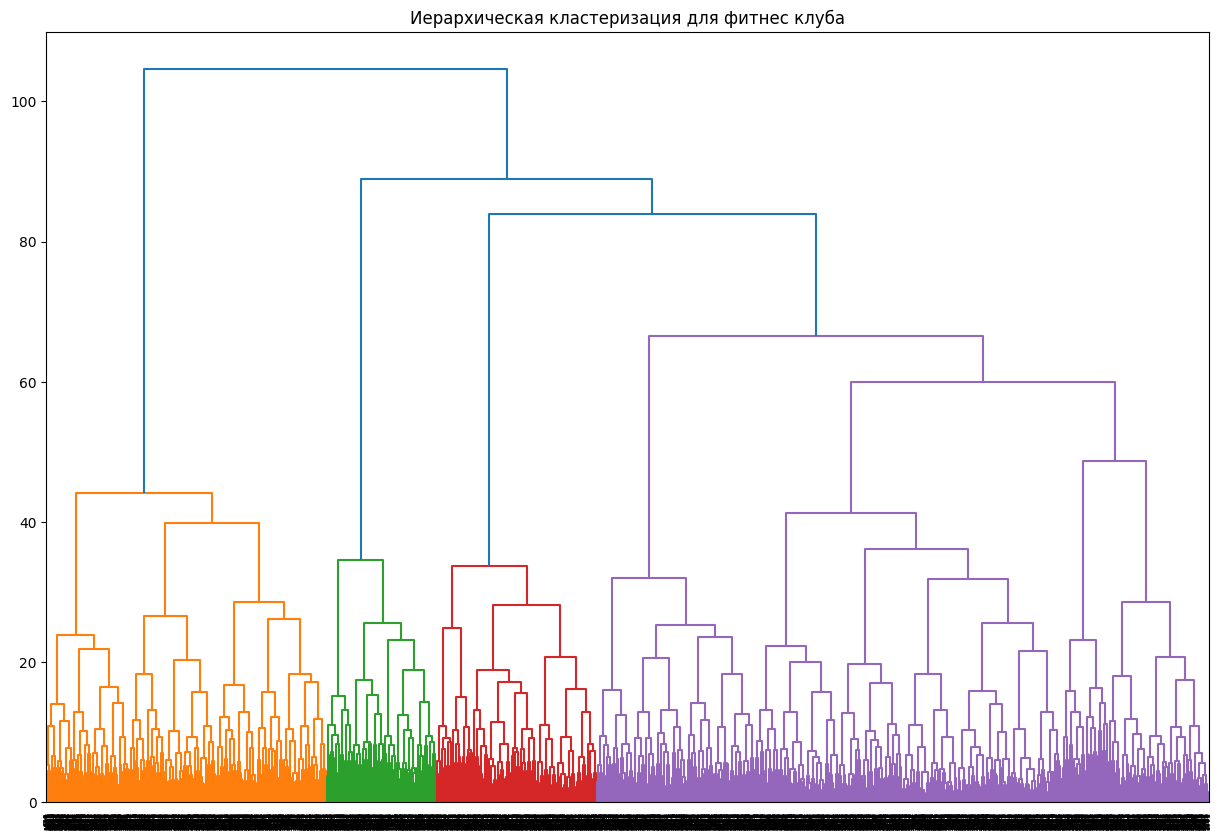

Из дендрограммы выдно насколь меняется результат при удалении целевого признака из набора данных

Из дендрограммы явно видно, что оптимальное количеством кластеров для нашего датесета равно 4

Разделим данные на 4 кластеров с применением метода KMeans и метрики высчитанной для агломеративной иерархической кластеризации

In [15]:
from sklearn.cluster import KMeans

# Задаём число кластеров, равное 4, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=4, random_state=0)
# Определяем соответствие значений кластерам
labels = km.fit_predict(df_sc)

## Приоизводим оценку средних значений призноков кластера

In [16]:
# Находим средние значения параметров по кластерам
df.groupby(labels).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0.551173,0.843284,0.364606,0.224947,0.910448,2.711087,0.443497,29.989339,158.543165,2.509595,4.755864,2.911693,2.919665,0.005330
1,0.465969,0.829319,0.450262,0.256545,0.901571,2.706806,0.380105,30.058639,152.315518,2.517277,4.653403,1.182065,1.178747,0.001047
2,0.510577,0.765385,0.344231,0.177885,0.902885,1.570192,0.263462,26.936538,114.544262,1.519231,0.975000,1.460512,1.031569,0.998077
3,0.513590,0.939082,0.765698,0.555764,0.899719,11.212746,0.558575,29.884724,163.518341,10.265230,4.667291,2.002911,1.997212,0.015933


Определили три признака (характеристики), оказавших наибольшее влияние на выделение кластеров используя оценку средних значений признаков на основе визуального анализа построенного графика:

* contract_period – Длительность текущего абонемента
* avg_additional_charges_total – Средние траты на доп 
* churn – Факт ухода из клуба

Данные признаки были выбраны, потому что они сильнее всего отличаются для разных кластеров.

### Метрика силуэта

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels)

0.1303924849369874

## K-Means кластеризация

Задали случайным образом число кластеров равное 4 и произвели кластеризацию 

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, random_state = 0)   # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels_km = km.fit_predict(df_sc)              # применяем алгоритм к данным и формируем вектор кластеров

Рассчитали евклидово расстояние между кластерами и построели тепловую карту для их отобрадения

<AxesSubplot: >

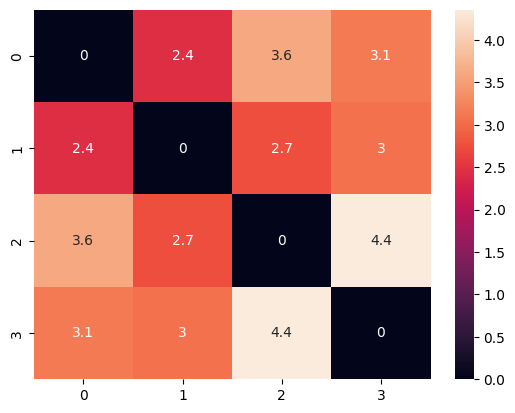

In [19]:
from sklearn.metrics.pairwise import euclidean_distances
from seaborn import heatmap

heatmap(euclidean_distances(km.cluster_centers_), annot=True)

In [20]:
# Находим средние значения параметров по кластерам
df.groupby(labels_km).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0.551173,0.843284,0.364606,0.224947,0.910448,2.711087,0.443497,29.989339,158.543165,2.509595,4.755864,2.911693,2.919665,0.005330
1,0.465969,0.829319,0.450262,0.256545,0.901571,2.706806,0.380105,30.058639,152.315518,2.517277,4.653403,1.182065,1.178747,0.001047
2,0.510577,0.765385,0.344231,0.177885,0.902885,1.570192,0.263462,26.936538,114.544262,1.519231,0.975000,1.460512,1.031569,0.998077
3,0.513590,0.939082,0.765698,0.555764,0.899719,11.212746,0.558575,29.884724,163.518341,10.265230,4.667291,2.002911,1.997212,0.015933


Аналогично тому, как мы определяли три признака наиболее повлиявших на разбиение кластеров в прошлый раз определили параметры, которые наиболее различны для кластеров, ими оказались следующие:
* contract_period – Длительность текущего абонемента
* month_to_end_contract – Количество месяцев до окончания абонемента
* churn – Факт ухода из клуба

### Определили объекты, относящиеся к каждому кластеру

* **Кластер 0**
  * Отток - 0,5%
  * Краткосрочные договора до 3 месяцев
  * Время с момента первого обращения в фитнес-центр более 4 
  * Живут или работают неподалеку от фитнес-клуба 84%
  * Средние траты на доп услуги 158.5
* **Кластер 1**
  * **Отток - 0,1% - свмый низкий**
  * Краткосрочные договора до 3 месяцев
  * Время с момента первого обращения в фитнес-центр более 4 
  * Живут или работают неподалеку от фитнес-клуба 82%
  * Средние траты на доп услуги 152.3
* **Кластер 2**
  * **Отток - 99% - самый высокий**
  * **Краткосрочные договора до 2 месяцев**
  * До окончания контракта меньше 2 месяцев
  * Время с момента первого обращения в фитнес-центр меньше 1 месяца
  * Живут или работают неподалеку от фитнес-клуба 76%
  * **Средние траты на доп услуги 114.5 - ниже остальных**
* **Кластер 3**
  * **Отток - 1,5%**
  * **Долгосрочные договора до 12 месяцев**
  * Время с момента первого обращения в фитнес-центр более 4 месяцев
  * Живут или работают неподалеку от фитнес-клуба 93%
  * **Средние траты на доп услуги 163.5 - самый высокий**

### Разделил данные на 2 класса и посчитаем сркднии значениця
Так как у нас бинарный результата, то есть либо клиент ушел либо остался посмотрим какие результаты мы получем для средних значений призноков при резбиении на 2 класса.

In [21]:
# Кластеризация без целевого признака

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, random_state = 0)  
labels_km = km.fit_predict(X)

df.groupby(labels_km).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0.516063,0.935065,0.740943,0.529050,0.898154,9.807929,0.543404,29.946685,163.379857,8.961039,4.797676,2.147120,2.135405,0.032809
1,0.506898,0.793457,0.340166,0.181317,0.906583,1.724872,0.336618,28.744580,137.465582,1.648009,3.106031,1.724416,1.554635,0.399291


In [22]:
# Метрика силуета
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels_km)

0.15836187757027995

### Метрика силуэта

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels_km)

0.15836187757027995

Отценка качества кластеризации методом силуета дала значение равное приближонно 0,13.

Так как значение метрики силуэта принимает значения от -1 до 1 и чем ближе к 1, тем качественнее кластеризация,то наше предположительное число кластеров в 4 является не самым оптимальным и его можно сокоректировать.

Значения, близкие к 0, указывают на перекрывающиеся кластеры.

### Определение оптимального числа кластеров

Чтобы рассчитать оптимальное число кластеров, воспользуемся критерием – суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

Данный критерий рассчитывается по формуле:

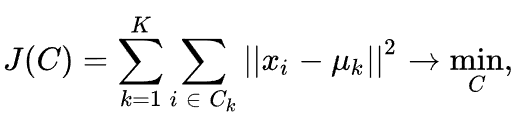

где C – множество кластеров мощности K, μ &#8342; – центроид кластера C &#8342;

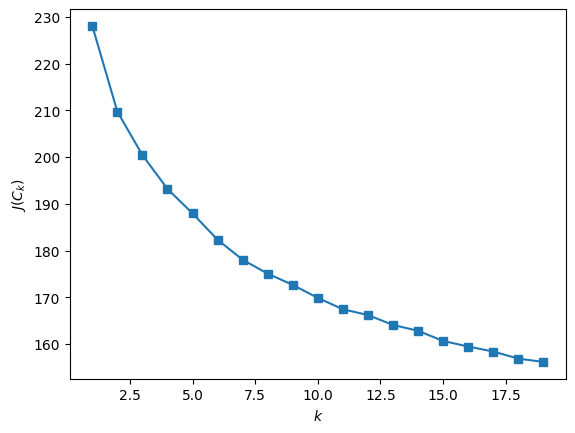

In [24]:
from sklearn.cluster import KMeans

inertia = []
mx = 20
for k in range(1, mx):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, mx), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

График получился довольно плавный поэтому конкретное число конкретное число кластером не так очевидно. По правилу локтя оптимальным можно выбрать значения 5, 6, или 7, потому что до 5 значения J(C&#8342;)  быстро падает с увеличением количества кластеров, а после 7 падение сильно замедляется.

## Вывод
В ходе данной лабораторной работы мы подготовили датасет и провели его кластеризацию.

Подготовили датасет с информацией о клиентах фитнес-клуба, исправив ошибки с названиями, в остальном данные были валидны.

Затем, чтобы можно было провести кластеризацию, стандартизировали данные, чтобы установить подходящие размерности параметров.

Стандартизированные данные подвергли кластеризации методом агломеративной иерархической кластеризации, в ходе которой определили по построенной дендрограме оптимальное число кластеров. На кластеризированых данных провели анализ и выяснили какие параметры имели наибольшее значение для разделения на кластеры.

Потом проделали кластеризацию тех же стандартизированных данных с применением алгоритма К-средних. Изначально было выбрано не самое оптимальное количество кластеров, это выяснилось при оценки критерием – суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся. Аналогично первому методу выделили параметры наиболее повлиявшие на разделение кластеров и описали в терминах предметной области получившиеся кластеры. 
